In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
vecs = np.load('activations1-rand.npy') #Loads activations from layer 12

In [21]:
np.shape(vecs)

(576, 4096)

In [22]:
def cossim(x,y):
    return np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))

def l2(x,y):
    return np.linalg.norm(x-y)

def merge(v,n): #Averages n over neighboring vectors
    if len(v[:,0])%n!=0:
        raise ValueError("length of v must be divisible by n")
    vp=np.zeros([int(len(v[:,0])/n),len(v[0,:])])
    for i in range (len(vp[:,0])):
        vp[i,:]=np.average(v[i*n:(i+1)*n,:],axis=0)
    return vp

def plotfunc(v,b):
    vp=np.zeros([int(len(v[:,0])),int(len(v[:,0]))])
    for i in range (len(vp[:,0])):
        for j in range (len(vp[0,:])):
            vp[i,j]=cossim(v[i,:],v[j,:])
    ax=sns.heatmap(vp, square=True, center=0.0)
    for i in b:
        ax.axvline(x=i, color='blue',linestyle=':')
        ax.axhline(y=i, color='blue',linestyle=':')
    plt.show()



In [23]:
def clustering(vs,nt,ct,metric='cossim'):
    borders=[]
    avgvecs=[]
    n=0
    if not (metric=='cossim' or metric=='l2'):
        raise ValueError("metric must be cossim or l2")
    if metric=='l2':
        ct=1/ct
    for i in range(len(vs[:,0])):
        if i==0:
            sumvec=vs[i,:]
            totcossim=0
        elif n<=nt:
            if metric=='cossim':
                totcossim += cossim(vs[i,:],sumvec)
            elif metric=='l2':
                totcossim += l2(vs[i,:],sumvec)
            sumvec+=vs[i,:]
        else:
            if cossim(sumvec,vs[i,:])>ct*totcossim/(n-1) and metric=='cossim':
                totcossim += cossim(vs[i,:],sumvec)
                sumvec+=vs[i,:]
            elif l2(sumvec,vs[i,:])<ct*totcossim/(n-1) and metric=='l2':
                totcossim += l2(vs[i,:],sumvec)
                sumvec+=vs[i,:]
            elif metric=='l2' or metric=='cossim':
                avgvecs.append(sumvec/n)
                borders.append(i)
                n=1
                sumvec=vs[i,:]
                totcossim=0
                continue
        n+=1
    return avgvecs,borders



In [24]:
n=4
avgvecs,borders=clustering(merge(vecs,n),2,0.7,metric='cossim')
print(np.asarray(borders)*n)
#s=''
#for b in borders:
#    s+=str(b*n)+','
#print('['+s[:-1]+']')

[]


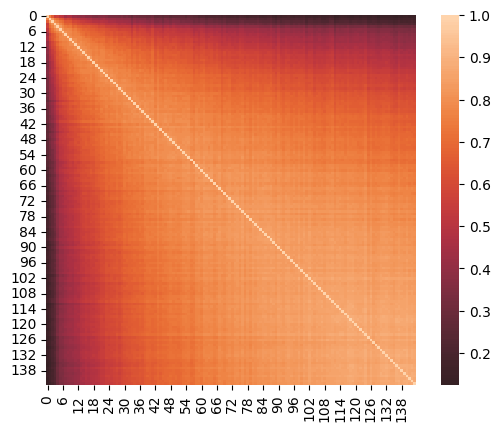

In [25]:
plotfunc(merge(vecs,n),borders)